<a href="https://colab.research.google.com/github/Esu-gra/its_Ai/blob/master/Classificatore_immagini_28x28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#import delle librerie
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [19]:
#Caricamento dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
#Preprocessing
#Normalizzazione pixel (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [21]:
#  il processo di flattening consiste nel trasformare
#un'immagine bidimensionale di dimensioni 28×28 pixel
#in un vettore unidimensionale di 784 element
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [22]:
#Modello base
# model_base = keras.Sequential([
#     layers.Dense(128, activation='relu', input_shape=(784,)),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

#Variante 1 Con Dropout -> anti-overfitting
#Il Dropout spegne casualmente neuroni durante il training.
# model_dropout = keras.Sequential([
#     layers.Dense(128, activation='relu', input_shape=(784,)),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(10, activation='softmax')
# ])

#VARIANTE 2 — Con Regularizzazione L2
#Penalizza pesi troppo grandi.
from tensorflow.keras import regularizers

model_l2 = keras.Sequential([
    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(784,)),
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
#Compilazione con learning rate personalizzato
optimizer = keras.optimizers.Adam(learning_rate=0.001)

#learning rate troppo alto
# optimizer = keras.optimizers.Adam(learning_rate=0.1)

# model_base.compile(
#     optimizer=optimizer,
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

#Variante 1 Con Dropout -> anti-overfitting
#Il Dropout spegne casualmente neuroni durante il training.
# model_dropout.compile(
#     optimizer=optimizer,
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

#Variante 2
model_l2.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#Usiamo sparse_categorical_crossentropy perché le etichette sono numeri (0-9)

In [24]:
#Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [25]:
#Addestramento base
# history_base = model_base.fit(
#     X_train,
#     y_train,
#     validation_split=0.2,
#     epochs=20,
#     batch_size=32,
#     callbacks=[early_stop]
# )


#con dropout
# history_base = model_dropout.fit(
#     X_train,
#     y_train,
#     validation_split=0.2,
#     epochs=20,
#     batch_size=32,
#     callbacks=[early_stop]
# )

#con regolarizzazione L2
history_base = model_l2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)



Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8691 - loss: 0.6679 - val_accuracy: 0.9493 - val_loss: 0.3103
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9548 - loss: 0.2944 - val_accuracy: 0.9621 - val_loss: 0.2560
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9628 - loss: 0.2452 - val_accuracy: 0.9633 - val_loss: 0.2351
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9694 - loss: 0.2187 - val_accuracy: 0.9682 - val_loss: 0.2217
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9719 - loss: 0.2013 - val_accuracy: 0.9617 - val_loss: 0.2237
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9723 - loss: 0.1933 - val_accuracy: 0.9671 - val_loss: 0.2113
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9733 - loss: 0.1846 - val_accuracy: 0.9673 - val_loss: 0.2030
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9746 - loss: 0.1773 - 

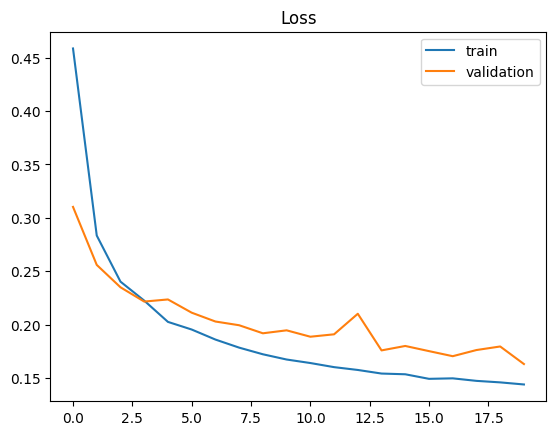

In [26]:
plt.plot(history_base.history['loss'])
plt.plot(history_base.history['val_loss'])
plt.legend(['train', 'validation'])
plt.title("Loss")
plt.show()

In [28]:
# loss, accuracy = model_base.evaluate(X_test, y_test)
# print("Accuracy finale:", accuracy)

# loss, accuracy = model_dropout.evaluate(X_test, y_test)
# print("Accuracy finale:", accuracy)

loss, accuracy = model_l2.evaluate(X_test, y_test)
print("Accuracy finale:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1701
Accuracy finale: 0.9767000079154968
